In [239]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
# Load House Price Dataset from Github to a dataframe
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')

# Part 1 Data Understanding –
Output of this part will be various visualization of the
variable analysis and finally the Data Quality Report that will identify the data problems
that exist in this dataset.

In [241]:
## print the shape of the dataframe
print(df.shape)

#There are 81 columns and 1460 rows

(1460, 81)


In [242]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [243]:
## check for missing values
print(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [245]:
## calculate basic statistics for a numeric column
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [246]:
## calculate the correlation between two numeric columns
print(df['OverallQual'].corr(df['SalePrice']))

0.7909816005838044


In [247]:
## Grouping the data by the neighborhood column and calculate statistics (mean) with the overall quality column
grouped_df = df.groupby('Neighborhood')['OverallQual'].mean()
print(grouped_df)

Neighborhood
Blmngtn    7.176471
Blueste    6.000000
BrDale     5.687500
BrkSide    5.051724
ClearCr    5.892857
CollgCr    6.640000
Crawfor    6.274510
Edwards    5.080000
Gilbert    6.556962
IDOTRR     4.756757
MeadowV    4.470588
Mitchel    5.591837
NAmes      5.360000
NPkVill    6.000000
NWAmes     6.328767
NoRidge    7.926829
NridgHt    8.259740
OldTown    5.389381
SWISU      5.440000
Sawyer     5.027027
SawyerW    6.322034
Somerst    7.337209
StoneBr    8.160000
Timber     7.157895
Veenker    6.727273
Name: OverallQual, dtype: float64


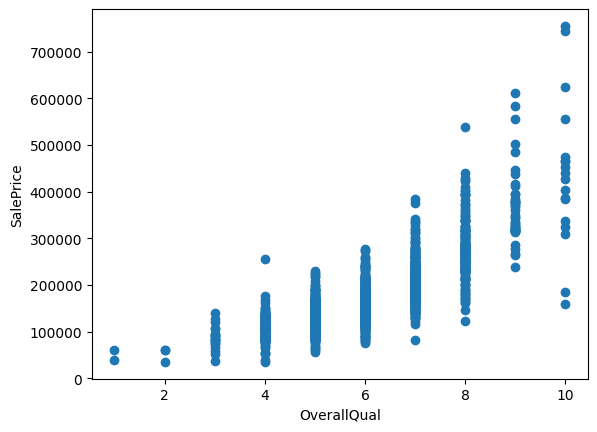

In [248]:
## scatter plot to visualize the relationship between the OverallQual column and the SalePrice column
## demonstrates the relationship between the overall quality of a property and its sale price, useful for spotting trends
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

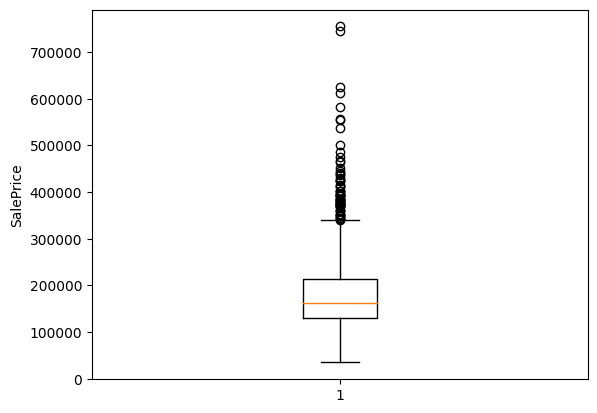

In [249]:
## box plot to visualize the distribution of a numeric column
## Useful for spotting extreme values that may indicate special cases or outliers
plt.boxplot(df['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

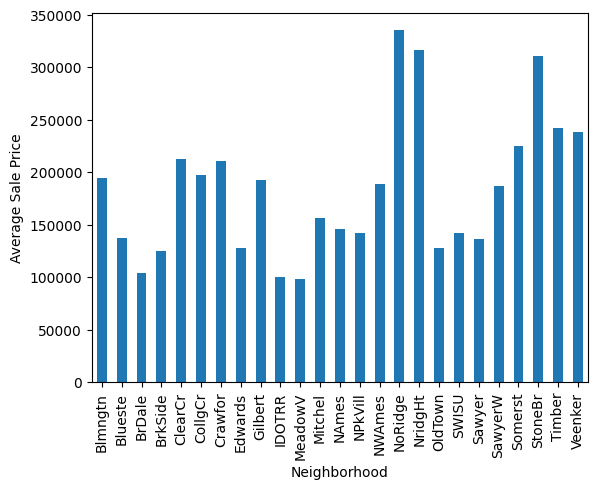

In [250]:
##bar plot to visualize the mean of a numeric column for each category of a categorical column
##the average sale price variation across various neighborhoods, which can indicate location value trends
df_grouped = df.groupby('Neighborhood')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Average Sale Price')
plt.show()

In [251]:
## pivot table to summarize the data
## For each Neighborhood, what is the SalePrice average by OverallQual
pivot_table = df.pivot_table(index='OverallQual', columns='Neighborhood', values='SalePrice', aggfunc='mean')
print(pivot_table)

Neighborhood        Blmngtn   Blueste         BrDale        BrkSide  \
OverallQual                                                           
1                       NaN       NaN            NaN   39300.000000   
2                       NaN       NaN            NaN   60000.000000   
3                       NaN       NaN            NaN   67000.000000   
4                       NaN       NaN            NaN  100850.000000   
5                       NaN       NaN  117000.000000  124661.904762   
6                       NaN  137500.0   98809.090909  145843.055556   
7             188660.285714       NaN            NaN  172125.000000   
8             223853.666667       NaN            NaN            NaN   
9                       NaN       NaN            NaN            NaN   
10                      NaN       NaN            NaN            NaN   

Neighborhood        ClearCr        CollgCr        Crawfor        Edwards  \
OverallQual                                                            

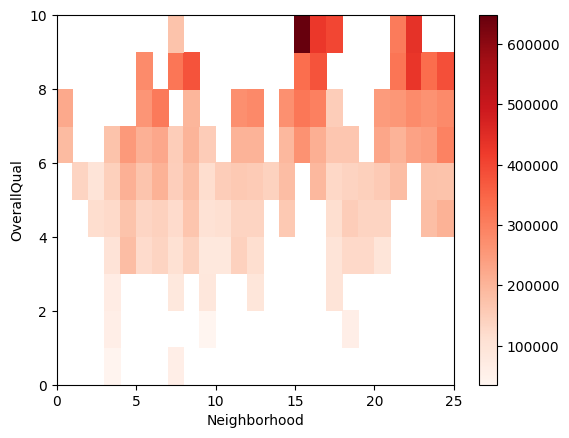

In [252]:
## create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.xlabel('Neighborhood')
plt.ylabel('OverallQual')
plt.show()

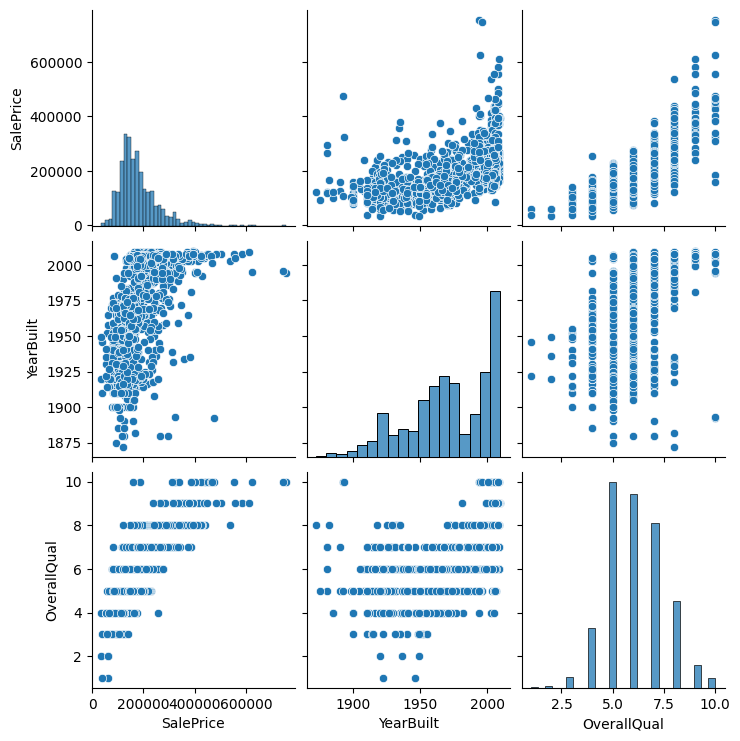

In [253]:
## create a pairplot to visualize the relationships between multiple SalePrice, YearBuilt, and OverallQual columns
## The key variables helps identify correlations, outliers and patterns for interaction between continous variables
sns.pairplot(df, vars=['SalePrice', 'YearBuilt', 'OverallQual'])
plt.show()

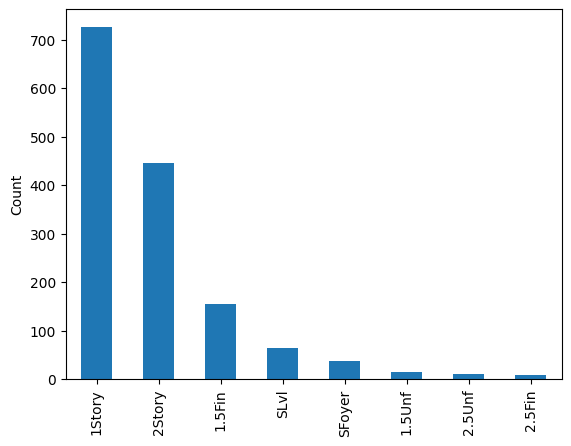

In [254]:
## create a bar plot to visualize the count of a categorical column
df['HouseStyle'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

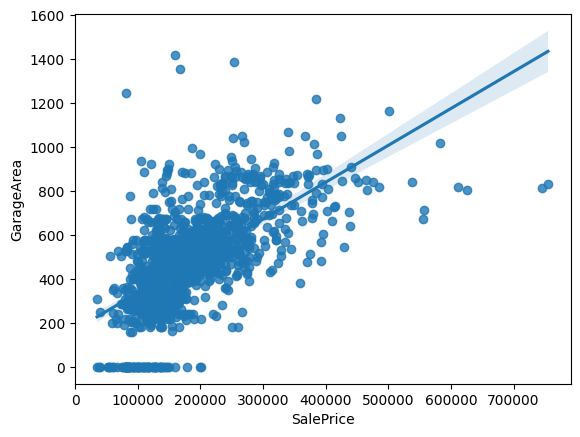

In [255]:
## regression plot to visualize the relationship between SalePrice and GarageArea columns
## Confidence Interval gives insight into strenght and direction between SalesPrice and GarageArea
sns.regplot(x='SalePrice', y='GarageArea', data=df)
plt.show()

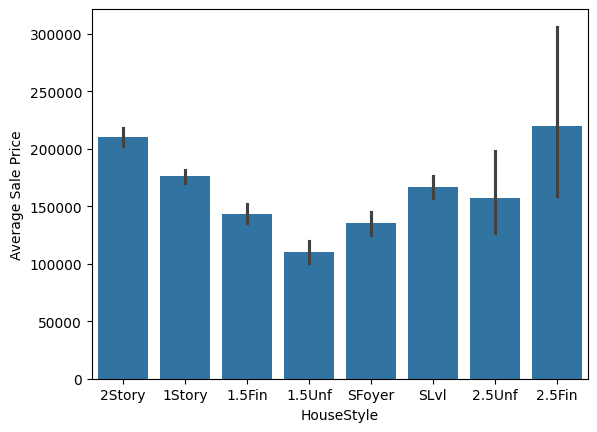

In [256]:
## barplot to visualize the mean of a numeric column by HouseStyle and SalePrice columns
sns.barplot(x='HouseStyle', y='SalePrice', data=df)
plt.ylabel('Average Sale Price')
plt.show()

In [257]:
## create a lmplot to visualize the relationship between GarageArea, LotArea, and HouseStyle column
sns.lmplot(x='GarageArea', y='LotArea', hue='HouseStyle', data=df)
plt.show()

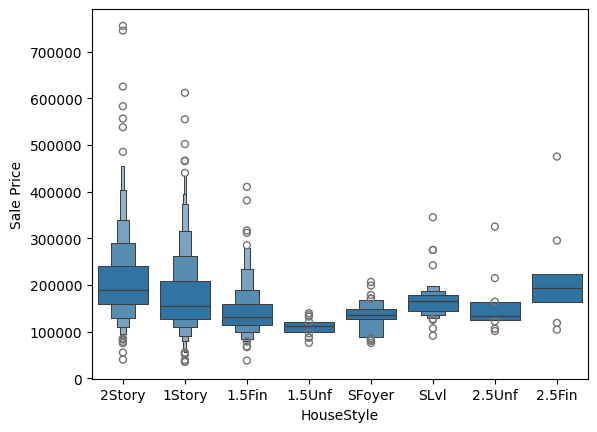

In [258]:
## create a boxenplot to visualize the distribution of HouseStyle column by the SalePrice column
sns.boxenplot(x='HouseStyle', y='SalePrice', data=df)
plt.ylabel('Sale Price')
plt.show()

# Data Quality Report

In [259]:
#Build a Data Quality Report for Continuous Features
#create a dataframe with continuous features, count of features, count of missing values, percentage of missing values, count of unique values, minimum value, maximum value, mean, median, standard deviation, 25th percentile, 75th percentile
df_continuous = df[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                        'MiscVal', 'SalePrice', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']]
df_continuous_report = pd.DataFrame(df_continuous.columns, columns=['Feature'])
df_continuous_report['Count'] = df_continuous.count().values
df_continuous_report['Missing Values'] = df_continuous.isnull().sum().values
df_continuous_report['% Missing'] = df_continuous.isnull().sum().values / df_continuous.count().values * 100
df_continuous_report['Unique'] = df_continuous.nunique().values
df_continuous_report['Min'] = df_continuous.min().values
df_continuous_report['1st qrt'] = df_continuous.quantile(0.25).values
df_continuous_report['Mean'] = df_continuous.mean().values
df_continuous_report['Median'] = df_continuous.median().values
df_continuous_report['75%'] = df_continuous.quantile(0.75).values
df_continuous_report['Max'] = df_continuous.max().values
df_continuous_report['Std'] = df_continuous.std().values
print(df_continuous_report)

          Feature  Count  Missing Values  % Missing  Unique      Min  \
0     LotFrontage   1201             259  21.565362     110     21.0   
1         LotArea   1460               0   0.000000    1073   1300.0   
2      MasVnrArea   1452               8   0.550964     327      0.0   
3      BsmtFinSF1   1460               0   0.000000     637      0.0   
4      BsmtFinSF2   1460               0   0.000000     144      0.0   
5       BsmtUnfSF   1460               0   0.000000     780      0.0   
6     TotalBsmtSF   1460               0   0.000000     721      0.0   
7        1stFlrSF   1460               0   0.000000     753    334.0   
8        2ndFlrSF   1460               0   0.000000     417      0.0   
9    LowQualFinSF   1460               0   0.000000      24      0.0   
10      GrLivArea   1460               0   0.000000     861    334.0   
11     GarageArea   1460               0   0.000000     441      0.0   
12     WoodDeckSF   1460               0   0.000000     274     

In [260]:
#Build a Data Quality Report for Categorical Features
#create a dataframe with categorical features, count of features, count of missing values, percentage of missing values, count of unique values, mode, mode frequency, mode percentage, 2nd mode, 2nd mode frequency, 2nd mode percentage
df_categorical = df[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                        'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]
df_categorical_report = pd.DataFrame(df_categorical.columns, columns=['Feature'])
df_categorical_report['Count'] = df_categorical.count().values
df_categorical_report['Missing Values'] = df_categorical.isnull().sum().values
df_categorical_report['% Missing'] = df_categorical.isnull().sum().values / df_categorical.count().values * 100
df_categorical_report['Unique'] = df_categorical.nunique().values
df_categorical_report['Mode'] = df_categorical.mode().iloc[0].values
df_categorical_report['Mode Freq'] = df_categorical.apply(lambda x: x.value_counts().values[0])
df_categorical_report['Mode %'] = df_categorical.apply(lambda x: x.value_counts(normalize=True).values[0])
df_categorical_report['2nd Mode'] = df_categorical.apply(lambda x: x.value_counts().values[1])
df_categorical_report['2nd Mode Freq'] = df_categorical.apply(lambda x: x.value_counts().values[1])
df_categorical_report['2nd Mode %'] = df_categorical.apply(lambda x: x.value_counts(normalize=True).values[1])
print(df_categorical_report)

          Feature  Count  Missing Values     % Missing  Unique     Mode  \
0        MSZoning   1460               0      0.000000       5       RL   
1          Street   1460               0      0.000000       2     Pave   
2           Alley     91            1369   1504.395604       2     Grvl   
3        LotShape   1460               0      0.000000       4      Reg   
4     LandContour   1460               0      0.000000       4      Lvl   
5       Utilities   1460               0      0.000000       2   AllPub   
6       LotConfig   1460               0      0.000000       5   Inside   
7       LandSlope   1460               0      0.000000       3      Gtl   
8    Neighborhood   1460               0      0.000000      25    NAmes   
9      Condition1   1460               0      0.000000       9     Norm   
10     Condition2   1460               0      0.000000       8     Norm   
11       BldgType   1460               0      0.000000       5     1Fam   
12     HouseStyle   1460 

Data Quality Plan

1. **Missing Values**: Lot Frontage (22%), Alley (1504%), Fireplace Quality (89%), Pool Quality (20757%), Fence (419%), Misc Feature (2603%), BsmtQual (3%), BsmtCond (3%), BsmtExposure (3%), BsmtFinType1 (3%), BsmtFinType2 (3%)
> **Strategies**: We need to drop all columns with >60% missing values. Since Lot Front only has 22% missing values, we will impute the column with the median. We will impute with the mode for the categorical columns with 3% missing values: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2. The remaining categorical columns will be dropped from the dataframe.

2. **Many Outliers**: LotArea, SalePrice, BsmtFinSF1, and BsmtFinSF1 all have a large gap between the min and median and the median and max, which led us to believe there are outliers in these features.
> **Strategies**: We will identify which rows contain these outliers and then drop the columns.

3. **Low Cardinality and Many Zero's**: 96% of the rows in MiscVal are zeros.
> **Strategies**: We need to drop MiscVal as a feature. Since we are dropping the value of misc features column(MiscVal), we should also drop the misc features columns (MiscFeature).

4. **Normalize/Scaling**: LotArea and SalePrice have a large gap between the lowest and highest values, which means we need to normalize the range so the coefficient is not wrongly inflated.
>**Strategies**: We need to normalize LotArea and SalePrice.

# Part 2 - Data Preprocessing
In this part you will fix the data problems identified in the Data Quality Report
learning from python techniques and code samples shared with you

In [261]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

In [262]:
# Handle missing values in the DataFrame
# Handle continous missing values

# Impute missing values with 'median'
df_preprocessed['LotFrontage'].fillna(df_preprocessed['LotFrontage'].median(), inplace=True)
df_preprocessed['GarageYrBlt'].fillna(df_preprocessed['GarageYrBlt'].median(), inplace=True)

print("Checking missing values for LotFrontage: ", df_preprocessed['LotFrontage'].isnull().sum())
print("Checking missing values for GarageYrBlt: ", df_preprocessed['GarageYrBlt'].isnull().sum())
#The only numerical feature that has a significant amount of missing values is LotFrontage and GarageYrBlt based on the Data Quality Report
#Here we use the imputing method to handle the missing values by replacing the missing values with the median.

Checking missing values for LotFrontage:  0
Checking missing values for GarageYrBlt:  0


In [263]:
# Handle categorical missing values in the DataFrame

# Impute missing values with 'mode'
df_preprocessed['BsmtQual'].fillna(df_preprocessed['BsmtQual'].mode(), inplace=True)
df_preprocessed['BsmtCond'].fillna(df_preprocessed['BsmtCond'].mode(), inplace=True)
df_preprocessed['BsmtExposure'].fillna(df_preprocessed['BsmtExposure'].mode(), inplace=True)
df_preprocessed['BsmtFinType1'].fillna(df_preprocessed['BsmtFinType1'].mode().iloc[0], inplace=True)
df_preprocessed['BsmtFinType2'].fillna(df_preprocessed['BsmtFinType2'].mode().iloc[0], inplace=True)


print("Checking missing values for BsmtQual: ", df_preprocessed['BsmtQual'].isnull().sum())
print("Checking missing values for BsmtCond: ", df_preprocessed['BsmtCond'].isnull().sum())
print("Checking missing values for BsmtExposure: ", df_preprocessed['BsmtExposure'].isnull().sum())
print("Checking missing values for BsmtFinType1: ", df_preprocessed['BsmtFinType1'].isnull().sum())
print("Checking missing values for BsmtFinType2: ", df_preprocessed['BsmtFinType2'].isnull().sum())
#The only numerical feature that has a significant amount of missing values is LotFrontage based on the Data Quality Report
#Here we use the imputing method to handle the missing values by replacing the missing values with the median.

Checking missing values for BsmtQual:  37
Checking missing values for BsmtCond:  37
Checking missing values for BsmtExposure:  38
Checking missing values for BsmtFinType1:  0
Checking missing values for BsmtFinType2:  0


In [264]:
#checking for more missing values
print(df_preprocessed.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [265]:
#dropping the missing values and count
df_preprocessed.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print(df_preprocessed.isnull().sum())

#Dropping those columns that had missing values >60%

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [266]:
#checking missing values in rows
missing_values_rows = df_preprocessed.isnull().sum(axis=1)
missing_values_rows

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      3
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      7
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      4
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      4
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      4
89      4
90      3
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      4


In [305]:
#Dropping rows that have missing values
# Identify rows with any missing values
rows_to_drop = df_preprocessed[df_preprocessed.isna().any(axis=1)].index

# Drop rows with any missing values
df_preprocessed = df_preprocessed.drop(index=rows_to_drop)

# Display the shape of the prepared DataFrame after dropping rows
print(df_preprocessed.shape)

#there were 122 rows that droped

(1324, 78)


In [268]:
#showing the index of the rows that droped
rows_to_drop

Int64Index([  17,   39,   48,   78,   88,   89,   90,   99,  102,  108,
            ...
            1325, 1326, 1337, 1349, 1379, 1407, 1412, 1449, 1450, 1453],
           dtype='int64', length=121)

In [269]:
#We want to drop any column that has a high quantity of zero's.
#show percent of zeros in miscval variable
print(df_preprocessed['MiscVal'].value_counts(normalize=True))

0        0.964384
400      0.007534
500      0.005479
700      0.003425
450      0.002740
600      0.002740
2000     0.002740
1200     0.001370
480      0.001370
15500    0.000685
800      0.000685
350      0.000685
3500     0.000685
1300     0.000685
54       0.000685
620      0.000685
560      0.000685
1400     0.000685
8300     0.000685
1150     0.000685
2500     0.000685
Name: MiscVal, dtype: float64


Drop Outliers:

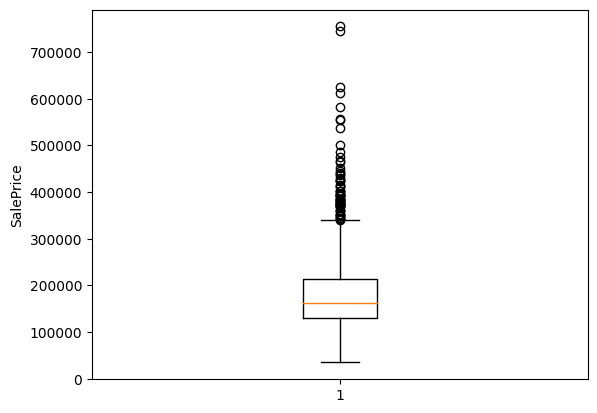

In [270]:
## create a box plot to visualize the distribution of SalePrice
plt.boxplot(df_preprocessed['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

In [271]:
#show the columns with outliers in SalePrice column
df_preprocessed[df_preprocessed['SalePrice'] > 500000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
178    179          20       RL         63.0    17423   Pave      IR1   
440    441          20       RL        105.0    15431   Pave      Reg   
691    692          60       RL        104.0    21535   Pave      IR1   
769    770          60       RL         47.0    53504   Pave      IR2   
803    804          60       RL        107.0    13891   Pave      Reg   
898    899          20       RL        100.0    12919   Pave      IR1   
1046  1047          60       RL         85.0    16056   Pave      IR1   
1169  1170          60       RL        118.0    35760   Pave      IR1   
1182  1183          60       RL        160.0    15623   Pave      IR1   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
178          Lvl    AllPub   CulDSac  ...             0         0           0   
440          Lvl    AllPub    Inside  ...             0         0         170   
691          Lvl    AllPub    Corner  ...             0         0           0   
769          HLS    AllPub   CulDSac  ...             0         0         210   
803          Lvl    AllPub    Inside  ...             0         0         192   
898          Lvl    AllPub    Inside  ...             0         0           0   
1046         Lvl    AllPub    Inside  ...             0         0           0   
1169         Lvl    AllPub   CulDSac  ...             0         0           0   
1182         Lvl    AllPub    Corner  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
178         0       0      7    2009       New        Partial     501837  
440         0       0      4    2009        WD         Normal     555000  
691         0       0      1    2007        WD         Normal     755000  
769         0       0      6    2010        WD         Normal     538000  
803         0       0      1    2009       New        Partial     582933  
898         0       0      3    2010       New        Partial     611657  
1046        0       0      7    2006       New        Partial     556581  
1169        0       0      7    2006        WD         Normal     625000  
1182      555       0      7    2007        WD        Abnorml     745000  

[9 rows x 76 columns]

In [272]:
#drop the columns with outliers in SalePrice column
df_preprocessed = df_preprocessed[df_preprocessed['SalePrice'] < 500000]

In [273]:
#show boxplot after removing SalePrice outliers
plt.boxplot(df_preprocessed['SalePrice'])
plt.ylabel('SalePrice')
plt.show()

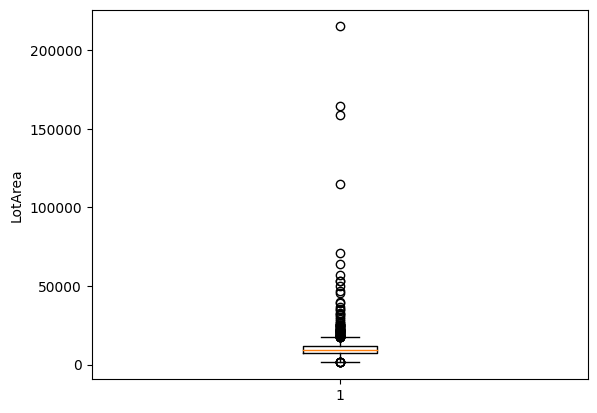

In [274]:
## create a box plot to visualize the distribution of LotArea
plt.boxplot(df_preprocessed['LotArea'])
plt.ylabel('LotArea')
plt.show()

In [275]:
#show the columns with outliers in LotArea column
df_preprocessed[df_preprocessed['LotArea'] > 100000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
249  250          50       RL         69.0   159000   Pave      IR2   
313  314          20       RL        150.0   215245   Pave      IR3   
335  336         190       RL         69.0   164660   Grvl      IR1   
706  707          20       RL         69.0   115149   Pave      IR2   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
249         Low    AllPub   CulDSac  ...             0         0           0   
313         Low    AllPub    Inside  ...             0         0           0   
335         HLS    AllPub    Corner  ...             0         0           0   
706         Low    AllPub   CulDSac  ...             0         0           0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
249        0     500      6    2007        WD         Normal     277000  
313        0       0      6    2009        WD         Normal     375000  
335        0     700      8    2008        WD         Normal     228950  
706        0       0      6    2007        WD         Normal     302000  

[4 rows x 76 columns]

In [276]:
#drop the outliers in the LotArea column
df_preprocessed = df_preprocessed[df_preprocessed['LotArea'] < 100000]
df_preprocessed.shape

(1447, 76)

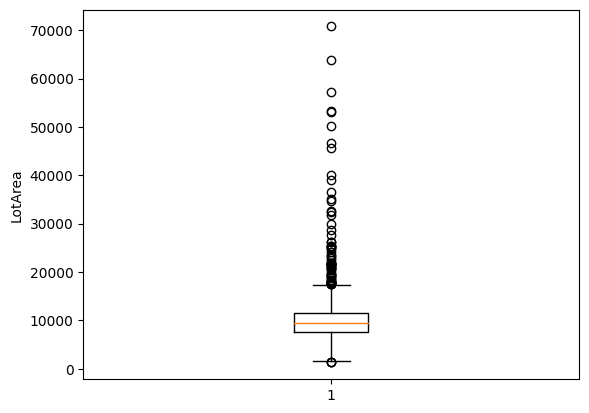

In [277]:
#show boxplot after dropping LotArea outliers
plt.boxplot(df_preprocessed['LotArea'])
plt.ylabel('LotArea')
plt.show()

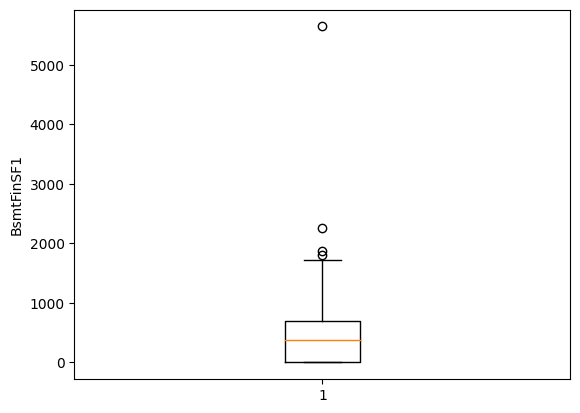

In [278]:
## create a box plot to visualize the distribution of BsmtFinSF1
plt.boxplot(df_preprocessed['BsmtFinSF1'])
plt.ylabel('BsmtFinSF1')
plt.show()

In [279]:
#show the column with outlier in bsmtfinsf1 column
df_preprocessed[df_preprocessed['BsmtFinSF1'] > 5000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1298         Bnk    AllPub    Corner  ...             0         0           0   

     PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1298      480       0      1    2008       New        Partial     160000  

[1 rows x 76 columns]

In [280]:
#drop column with outlier in bsmtfinsf1 column
df_preprocessed = df_preprocessed[df_preprocessed['BsmtFinSF1'] < 5000]
df_preprocessed.shape

(1446, 76)

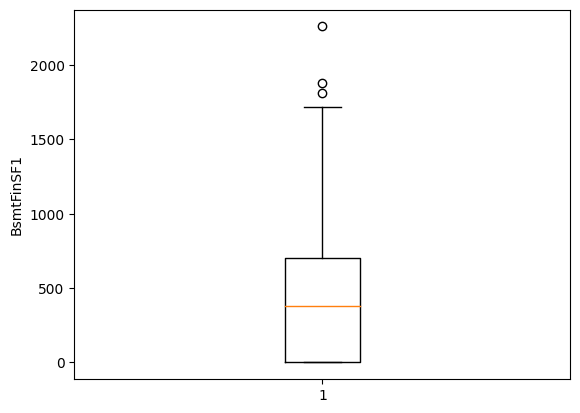

In [281]:
#show boxplot after dropping bsmtfinsf1 outlier
plt.boxplot(df_preprocessed['BsmtFinSF1'])
plt.ylabel('BsmtFinSF1')
plt.show()

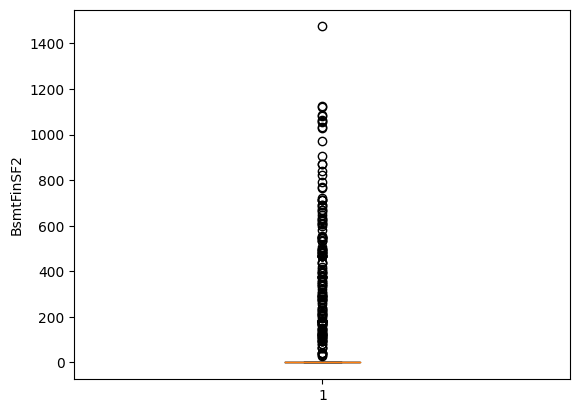

In [282]:
## create a box plot to visualize the distribution of BsmtFinSF2
plt.boxplot(df_preprocessed['BsmtFinSF2'])
plt.ylabel('BsmtFinSF2')
plt.show()

In [283]:
#show the columns with outliers in bsmtfinsf2 column
df_preprocessed[df_preprocessed['BsmtFinSF2'] > 1200]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
322  323          60       RL         86.0    10380   Pave      IR1   

    LandContour Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch  \
322         Lvl    AllPub    Inside  ...             0         0           0   

    PoolArea MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
322        0       0      8    2007        WD         Normal     301000  

[1 rows x 76 columns]

In [284]:
#remove column with outlier in bsmtfinsf2 column
df_preprocessed = df_preprocessed[df_preprocessed['BsmtFinSF2'] < 1200]
df_preprocessed.shape

(1445, 76)

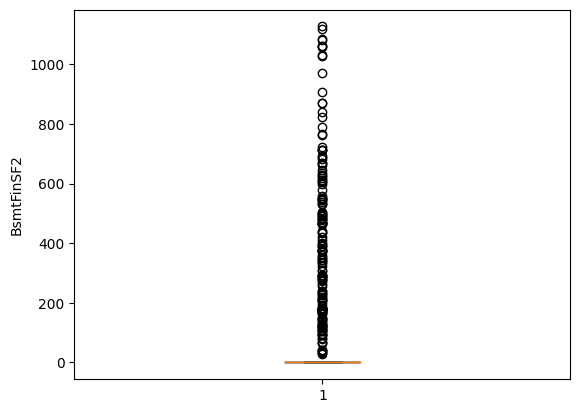

In [285]:
#show boxplot after dropping bsmtfinsf2 outlier
plt.boxplot(df_preprocessed['BsmtFinSF2'])
plt.ylabel('BsmtFinSF2')
plt.show()

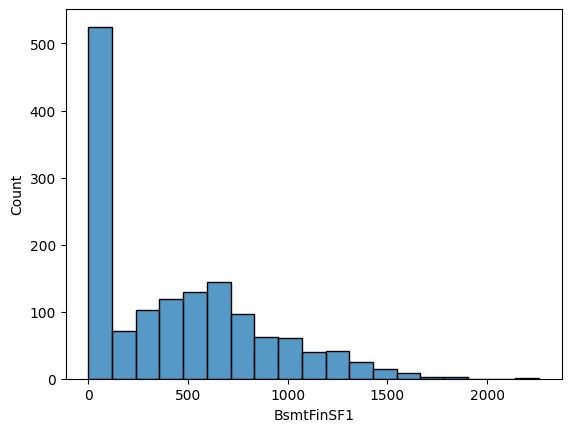

In [286]:
## create a histogram to visualize the distribution of LotArea
## Provides more context due to large amount of zeros,
sns.histplot(df_preprocessed['BsmtFinSF1'])
plt.show()

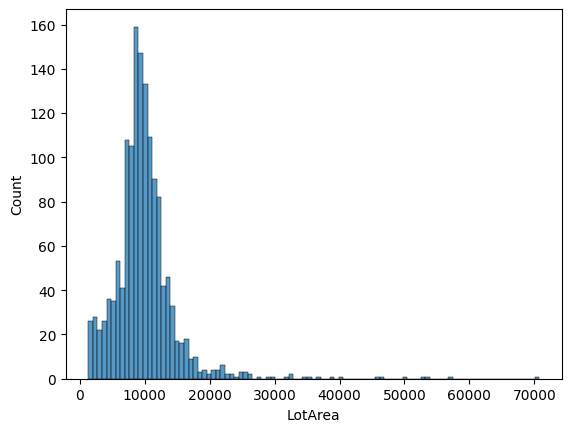

In [287]:
## create a histogram to visualize the distribution of LotArea
sns.histplot(df_preprocessed['LotArea'])
plt.show()

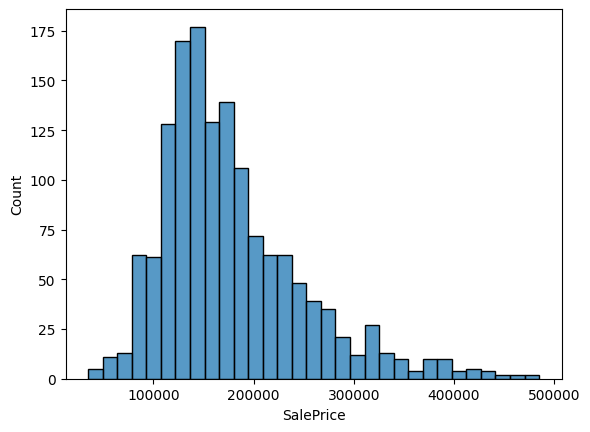

In [288]:
## create a histogram to visualize the distribution of SalePrice
## shows the distribution shape and skewness
sns.histplot(df_preprocessed['SalePrice'])
plt.show()

In [289]:
#Next, we will format all categorical variables to be lowercase and uniform.

df_categorical = df_preprocessed[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                        'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                        'PavedDrive', 'SaleType', 'SaleCondition']]
df_categorical = df_categorical.apply(lambda x: x.str.lower())
df_categorical

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          rl   pave      reg         lvl    allpub    inside       gtl   
1          rl   pave      reg         lvl    allpub       fr2       gtl   
2          rl   pave      ir1         lvl    allpub    inside       gtl   
3          rl   pave      ir1         lvl    allpub    corner       gtl   
4          rl   pave      ir1         lvl    allpub       fr2       gtl   
5          rl   pave      ir1         lvl    allpub    inside       gtl   
6          rl   pave      reg         lvl    allpub    inside       gtl   
7          rl   pave      ir1         lvl    allpub    corner       gtl   
8          rm   pave      reg         lvl    allpub    inside       gtl   
9          rl   pave      reg         lvl    allpub    corner       gtl   
10         rl   pave      reg         lvl    allpub    inside       gtl   
11         rl   pave      ir1         lvl    allpub    inside       gtl   
12         rl   pave      ir2         lvl    allpub    inside       gtl   
13         rl   pave      ir1         lvl    allpub    inside       gtl   
14         rl   pave      ir1         lvl    allpub    corner       gtl   
15         rm   pave      reg         lvl    allpub    corner       gtl   
16         rl   pave      ir1         lvl    allpub   culdsac       gtl   
17         rl   pave      reg         lvl    allpub    inside       gtl   
18         rl   pave      reg         lvl    allpub    inside       gtl   
19         rl   pave      reg         lvl    allpub    inside       gtl   
20         rl   pave      ir1         lvl    allpub    corner       gtl   
21         rm   pave      reg         bnk    allpub    inside       gtl   
22         rl   pave      reg         lvl    allpub    inside       gtl   
23         rm   pave      reg         lvl    allpub    inside       gtl   
24         rl   pave      ir1         lvl    allpub    inside       gtl   
25         rl   pave      reg         lvl    allpub    corner       gtl   
26         rl   pave      reg         lvl    allpub    corner       gtl   
27         rl   pave      reg         lvl    allpub    inside       gtl   
28         rl   pave      ir1         lvl    allpub   culdsac       gtl   
29         rm   pave      ir1         lvl    allpub    inside       gtl   
30    c (all)   pave      reg         lvl    allpub    inside       gtl   
31         rl   pave      ir1         lvl    allpub   culdsac       gtl   
32         rl   pave      reg         lvl    allpub    corner       gtl   
33         rl   pave      ir1         lvl    allpub    inside       gtl   
34         rl   pave      reg         lvl    allpub    inside       gtl   
35         rl   pave      reg         lvl    allpub    inside       gtl   
36         rl   pave      reg         lvl    allpub    corner       gtl   
37         rl   pave      reg         lvl    allpub    inside       gtl   
38         rl   pave      reg         lvl    allpub    inside       gtl   
39         rl   pave      reg         lvl    allpub    inside       gtl   
40         rl   pave      reg         lvl    allpub    inside       gtl   
41         rl   pave      reg         lvl    allpub    inside       gtl   
42         rl   pave      ir1         lvl    allpub   culdsac       gtl   
43         rl   pave      ir1         lvl    allpub   culdsac       gtl   
44         rl   pave      reg         lvl    allpub    inside       gtl   
45         rl   pave      reg         lvl    allpub    inside       gtl   
46         rl   pave      ir1         lvl    allpub   culdsac       gtl   
47         fv   pave      reg         lvl    allpub    inside       gtl   
48         rm   pave      reg         lvl    allpub    inside       gtl   
49         rl   pave      reg         lvl    allpub    inside       gtl   
50         rl   pave      ir2         lvl    allpub    corner       gtl   
51         rm   pave      reg         lvl    allpub    inside       gtl   
52         rm   grvl      ir2 

In [290]:
#checking duplicates
df_preprocessed.duplicated()
#No duplicates found

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [291]:
#Build a Data Quality Report for Continuous Features
#create a dataframe with continuous features, count of features, count of missing values, percentage of missing values, count of unique values, minimum value, maximum value, mean, median, standard deviation, 25th percentile, 75th percentile
df_continuous = df_preprocessed[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                                 'MiscVal', 'SalePrice', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                                 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']]
df_continuous_report = pd.DataFrame(df_continuous.columns, columns=['Feature'])
df_continuous_report['Count'] = df_continuous.count().values
df_continuous_report['Missing Values'] = df_continuous.isnull().sum().values
df_continuous_report['% Missing'] = df_continuous.isnull().sum().values / df_continuous.count().values * 100
df_continuous_report['Unique'] = df_continuous.nunique().values
df_continuous_report['Min'] = df_continuous.min().values
df_continuous_report['1st qrt'] = df_continuous.quantile(0.25).values
df_continuous_report['Mean'] = df_continuous.mean().values
df_continuous_report['Median'] = df_continuous.median().values
df_continuous_report['75%'] = df_continuous.quantile(0.75).values
df_continuous_report['Max'] = df_continuous.max().values
df_continuous_report['Std'] = df_continuous.std().values
print(df_continuous_report)

          Feature  Count  Missing Values  % Missing  Unique      Min  \
0     LotFrontage   1445               0   0.000000     108     21.0   
1         LotArea   1445               0   0.000000    1059   1300.0   
2      MasVnrArea   1437               8   0.556715     321      0.0   
3      BsmtFinSF1   1445               0   0.000000     627      0.0   
4      BsmtFinSF2   1445               0   0.000000     142      0.0   
5       BsmtUnfSF   1445               0   0.000000     774      0.0   
6     TotalBsmtSF   1445               0   0.000000     711      0.0   
7        1stFlrSF   1445               0   0.000000     739    334.0   
8        2ndFlrSF   1445               0   0.000000     409      0.0   
9    LowQualFinSF   1445               0   0.000000      24      0.0   
10      GrLivArea   1445               0   0.000000     848    334.0   
11     GarageArea   1445               0   0.000000     432      0.0   
12     WoodDeckSF   1445               0   0.000000     268     

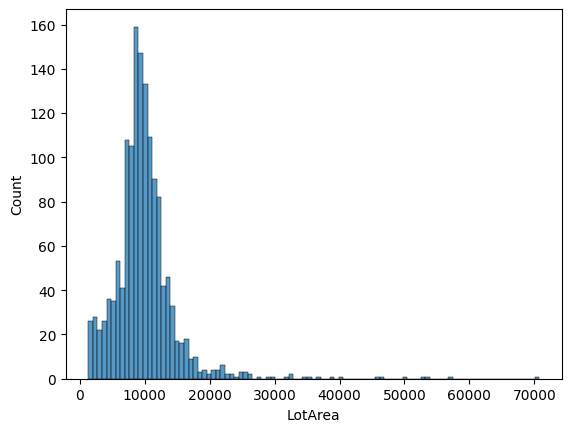

In [292]:
## create a histogram to visualize the distribution of a numeric column
sns.histplot(df_preprocessed['LotArea'])
plt.show()

In [293]:
# apply a min-max scaling to LotArea and SalePrice columns.
#BY transforming the data in the column to a range between 0 and 1.
#This scaling can be useful in certain machine learning algorithms where features with different scales might have an impact on the model's performance
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#creating a new column
df_preprocessed['LotArea_scaled_minmax'] = scaler.fit_transform(df_preprocessed[['LotArea']])

In [294]:
print(df_preprocessed['LotArea_scaled_minmax'].describe())

count    1445.000000
mean        0.124992
std         0.076404
min         0.000000
25%         0.089259
50%         0.117044
75%         0.146528
max         1.000000
Name: LotArea_scaled_minmax, dtype: float64


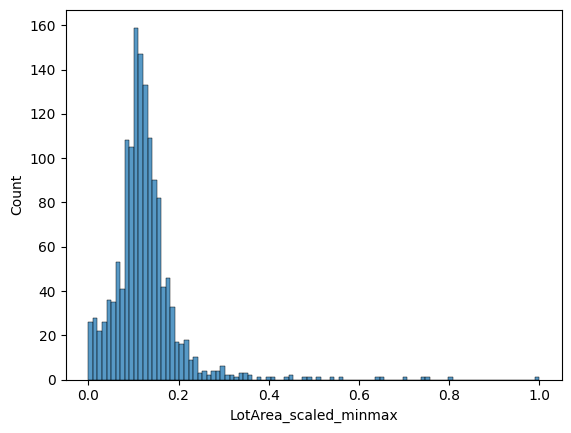

In [295]:
## create a histogram to visualize the distribution of a numeric column
sns.histplot(df_preprocessed['LotArea_scaled_minmax'])
plt.show()

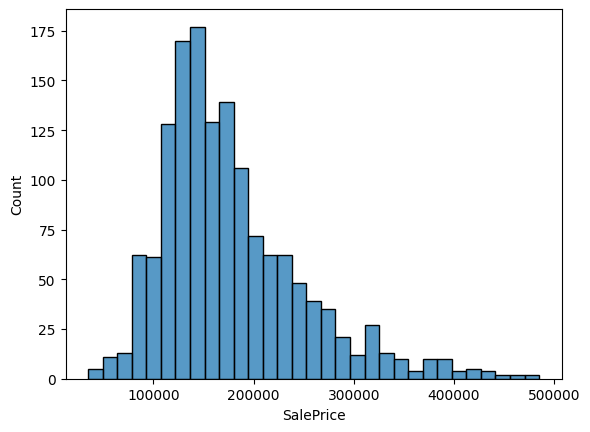

In [296]:
## create a histogram to visualize the distribution of a numeric column
sns.histplot(df_preprocessed['SalePrice'])
plt.show()

In [297]:
scaler = MinMaxScaler()
#creating a new column
df_preprocessed['SalePrice_scaled_minmax'] = scaler.fit_transform(df_preprocessed[['SalePrice']])

In [298]:
print(df_preprocessed['SalePrice_scaled_minmax'].describe())

count    1445.000000
mean        0.317653
std         0.159177
min         0.000000
25%         0.211064
50%         0.282382
75%         0.393468
max         1.000000
Name: SalePrice_scaled_minmax, dtype: float64


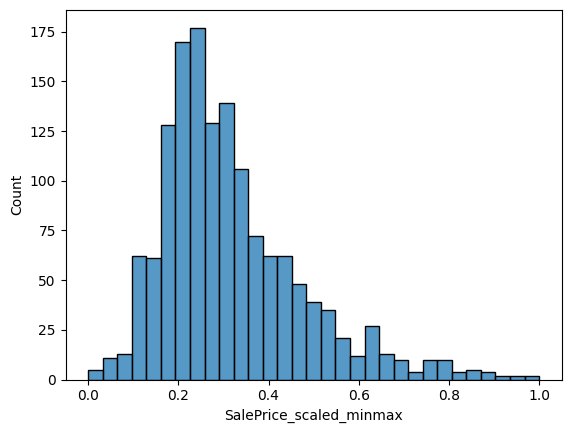

In [299]:
## create a histogram to visualize the distribution of SalePrice
sns.histplot(df_preprocessed['SalePrice_scaled_minmax'])
plt.show()

#Part 3 - Collinearity and Feature Selection

In [300]:
correlation_matrix = df_preprocessed.corr()
correlation_matrix

<ipython-input-300-50caefe867fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_preprocessed.corr()


Id  MSSubClass  LotFrontage   LotArea  \
Id                       1.000000    0.011394    -0.023572 -0.008059   
MSSubClass               0.011394    1.000000    -0.378195 -0.290146   
LotFrontage             -0.023572   -0.378195     1.000000  0.419048   
LotArea                 -0.008059   -0.290146     0.419048  1.000000   
OverallQual             -0.034180    0.039461     0.205410  0.143380   
OverallCond              0.014266   -0.061781    -0.047413 -0.012436   
YearBuilt               -0.014827    0.030220     0.106700  0.022469   
YearRemodAdd            -0.023826    0.044909     0.075798  0.020455   
MasVnrArea              -0.058391    0.030128     0.148415  0.089200   
BsmtFinSF1              -0.015081   -0.072036     0.120382  0.192451   
BsmtFinSF2               0.005681   -0.066076     0.029609  0.086206   
BsmtUnfSF               -0.010939   -0.141822     0.134306  0.044663   
TotalBsmtSF             -0.025411   -0.253930     0.282340  0.282256   
1stFlrSF                 0.004294   -0.263228     0.354959  0.371916   
2ndFlrSF                -0.001584    0.313561     0.047759  0.077436   
LowQualFinSF            -0.044510    0.046632     0.042250  0.021219   
GrLivArea               -0.002585    0.081458     0.309100  0.345374   
BsmtFullBath             0.003697    0.001092     0.059723  0.127656   
BsmtHalfBath            -0.017083   -0.002239    -0.007419  0.028257   
FullBath                 0.002564    0.134288     0.166649  0.137731   
HalfBath                 0.000911    0.179227     0.033042  0.064822   
BedroomAbvGr             0.035017   -0.027666     0.243831  0.192588   
KitchenAbvGr             0.002774    0.283010    -0.000997 -0.012199   
TotRmsAbvGrd             0.023028    0.043916     0.297921  0.280520   
Fireplaces              -0.019959   -0.046073     0.200862  0.307306   
GarageYrBlt             -0.002870    0.084673     0.050793 -0.023838   
GarageCars               0.015723   -0.038453     0.271096  0.243808   
GarageArea               0.013950   -0.098017     0.299602  0.270314   
WoodDeckSF              -0.032031   -0.024091     0.071525  0.204328   
OpenPorchSF             -0.004850   -0.004830     0.112335  0.149781   
EnclosedPorch            0.002580   -0.012300     0.018122  0.001736   
3SsnPorch               -0.046921   -0.044100     0.068203  0.050400   
ScreenPorch              0.001904   -0.025099     0.040804  0.084689   
PoolArea                 0.040857    0.007951     0.063666  0.068313   
MiscVal                 -0.004649   -0.010721     0.001516  0.033053   
MoSold                   0.023614   -0.016104     0.032760  0.014973   
YrSold                   0.003044   -0.019652     0.006679 -0.039209   
SalePrice               -0.028342   -0.085526     0.330798  0.338137   
LotArea_scaled_minmax   -0.008059   -0.290146     0.419048  1.000000   
SalePrice_scaled_minmax -0.028342   -0.085526     0.330798  0.338137   

                         OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                         -0.034180     0.014266  -0.014827     -0.023826   
MSSubClass                  0.039461    -0.061781   0.030220      0.044909   
LotFrontage                 0.205410    -0.047413   0.106700      0.075798   
LotArea                     0.143380    -0.012436   0.022469      0.020455   
OverallQual                 1.000000    -0.086188   0.569295      0.549467   
OverallCond                -0.086188     1.000000  -0.374357      0.076562   
YearBuilt                   0.569295    -0.374357   1.000000      0.590815   
YearRemodAdd                0.549467     0.076562   0.590815      1.000000   
MasVnrArea                  0.389520    -0.129300   0.312719      0.168509   
BsmtFinSF1                  0.204902    -0.039904   0.246463      0.118551   
BsmtFinSF2                 -0.070891     0.047354  -0.054488     -0.068206   
BsmtUnfSF                   0.311941    -0.138479   0.148261      0.179281   
TotalBsmtSF                 0.524357    -0.173384   0.396944    

<ipython-input-301-f3a364713b12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_preprocessed.corr(), cmap='RdYlGn', annot=True)


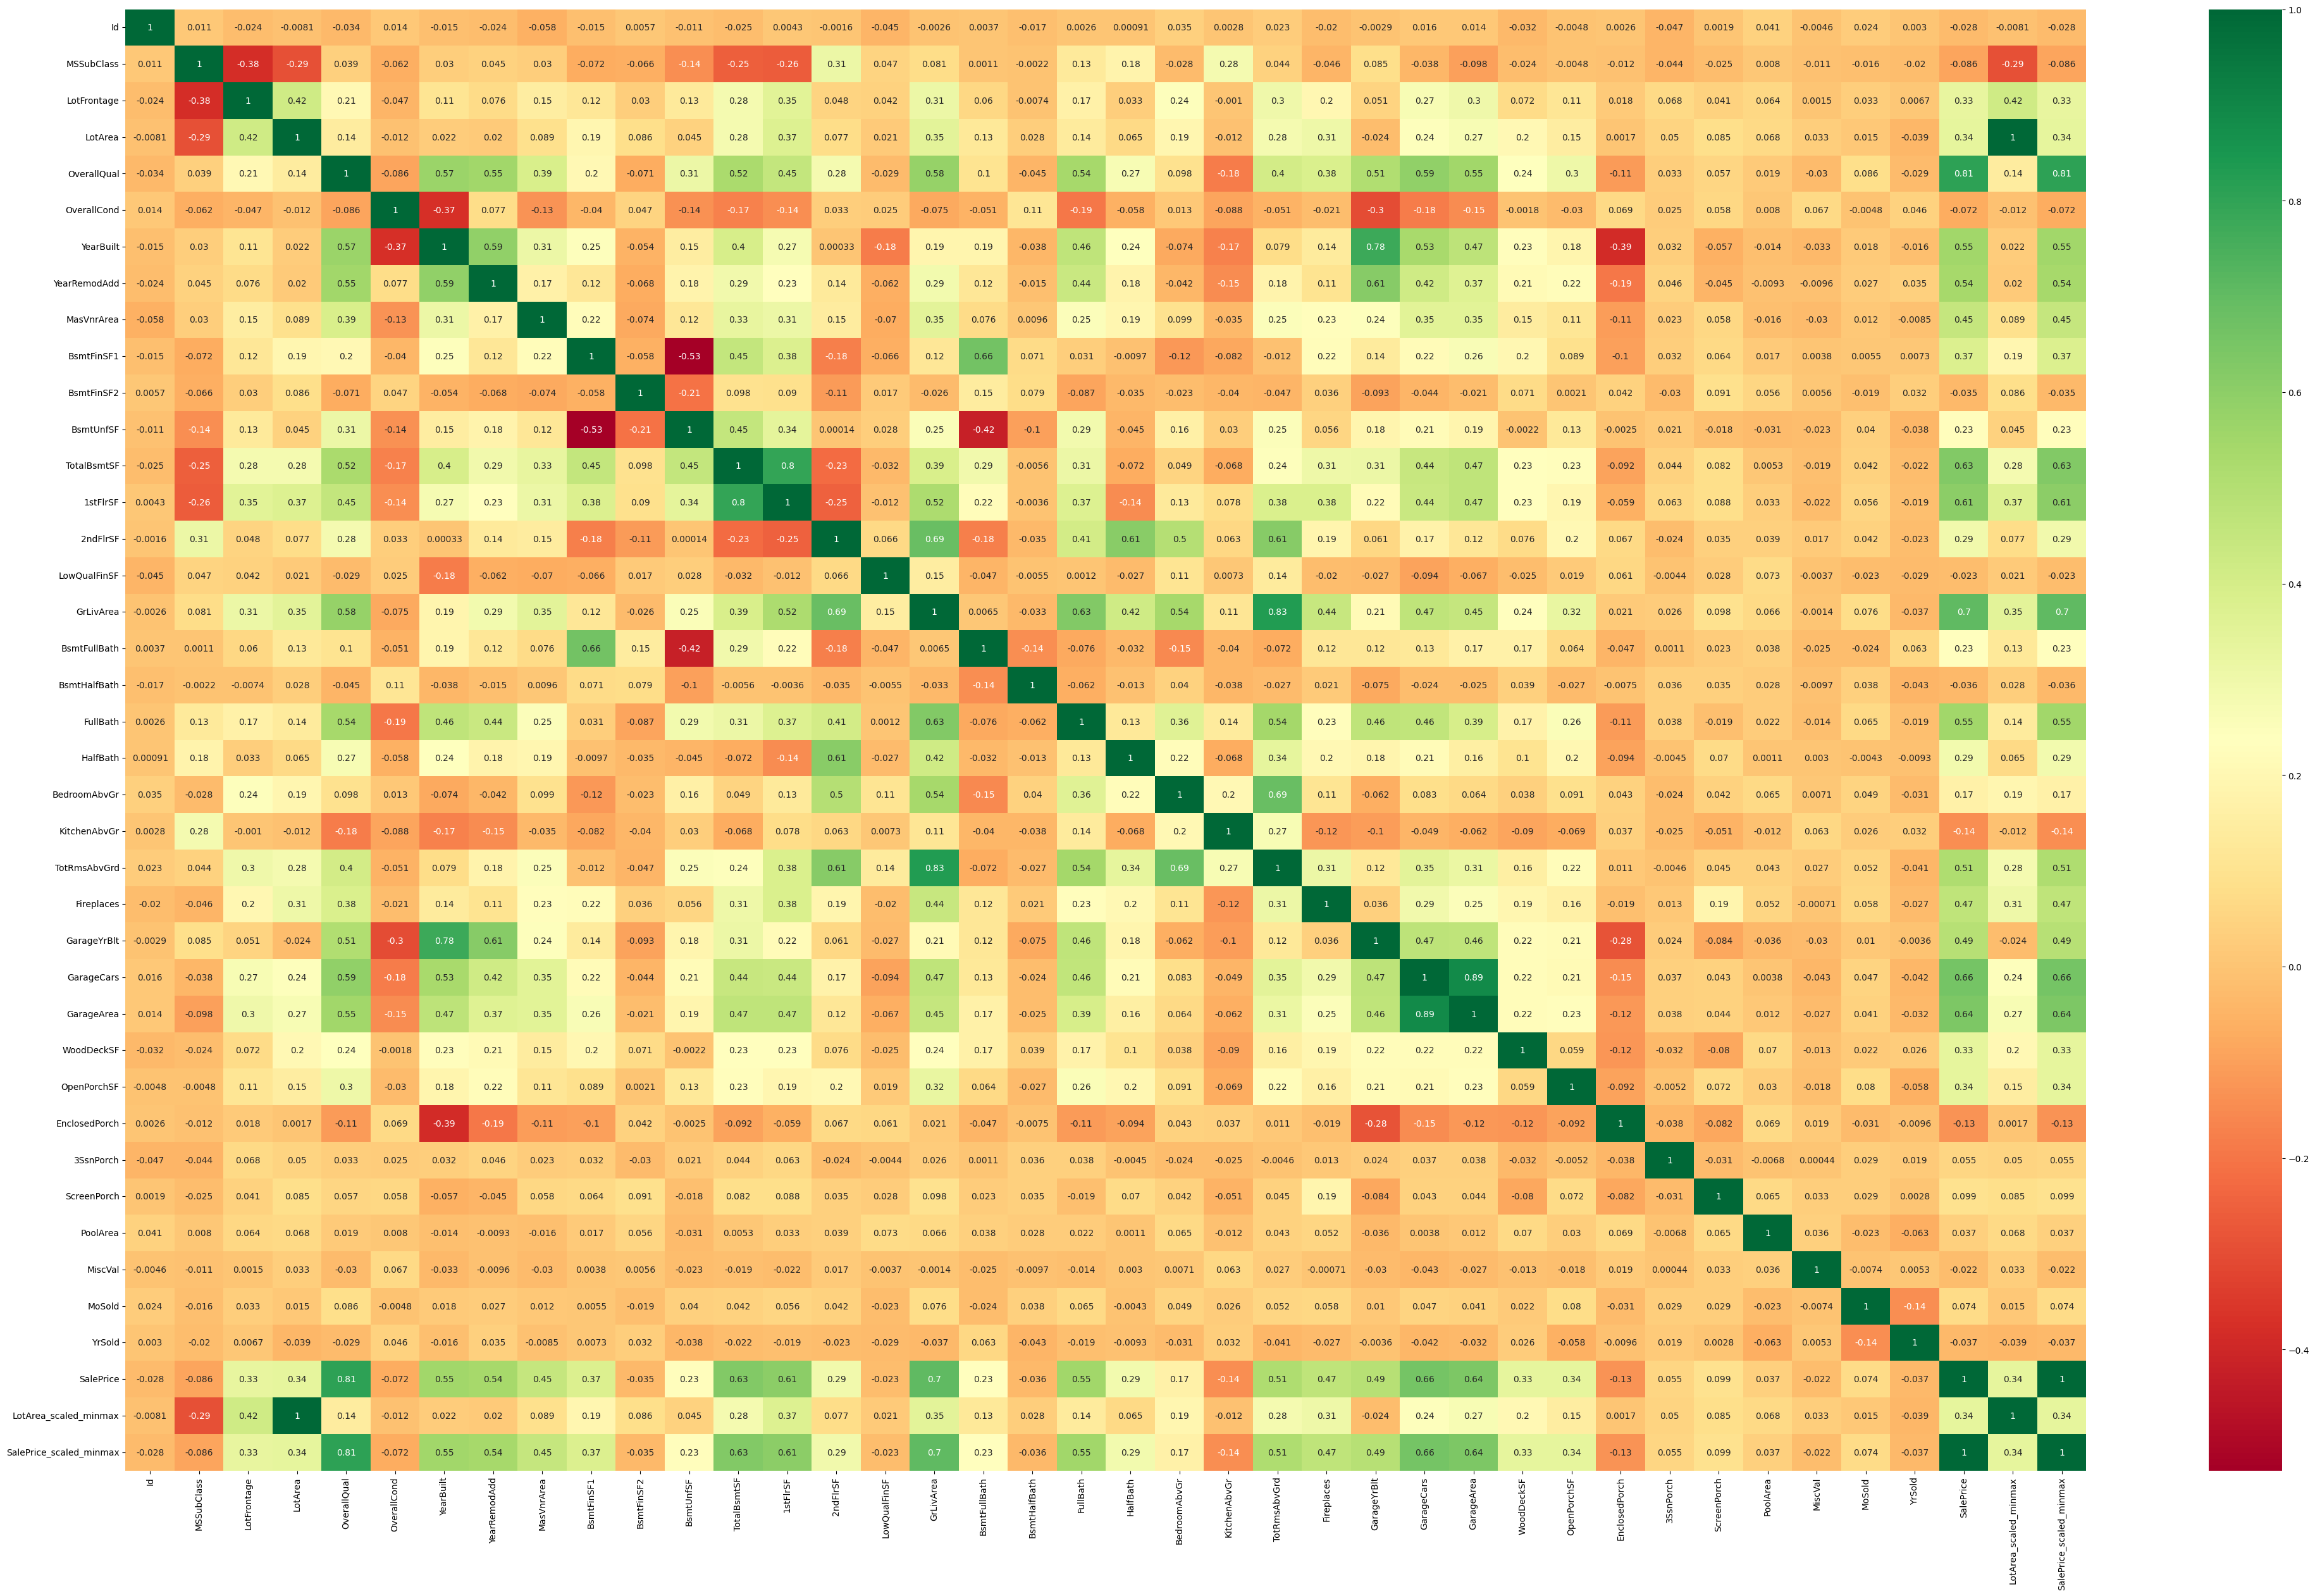

In [301]:
# create a heatmap to visualize the collinearity between multiple columns
plt.figure(figsize=(50, 30))
sns.heatmap(df_preprocessed.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [302]:
#dropping columns based on the correlation metrix.
#In order to prepare the dataframe for the machine learning model

# Set the correlation threshold
correlation_threshold = 0.7

# Identify highly correlated columns by accessing the columns of the correlation matrix
#then, selecting only columns with at least one highly correlated pair.
#lastly, converting the selected columns to a list
high_correlation_columns = df_preprocessed.corr().abs()[df_preprocessed.corr().abs() > correlation_threshold].stack().index.tolist()

# Drop columns based on high correlation
df_prepared = df_preprocessed.drop(columns=[column for column, _ in high_correlation_columns])

# Display the prepared DataFrame shape (columns and rows numbers)
df_prepared.shape

<ipython-input-302-bda7043b5077>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_correlation_columns = df_preprocessed.corr().abs()[df_preprocessed.corr().abs() > correlation_threshold].stack().index.tolist()


(1445, 38)

In [303]:
# showing the correlated pair that have high correlation
high_correlation_columns

[('Id', 'Id'),
 ('MSSubClass', 'MSSubClass'),
 ('LotFrontage', 'LotFrontage'),
 ('LotArea', 'LotArea'),
 ('LotArea', 'LotArea_scaled_minmax'),
 ('OverallQual', 'OverallQual'),
 ('OverallQual', 'SalePrice'),
 ('OverallQual', 'SalePrice_scaled_minmax'),
 ('OverallCond', 'OverallCond'),
 ('YearBuilt', 'YearBuilt'),
 ('YearBuilt', 'GarageYrBlt'),
 ('YearRemodAdd', 'YearRemodAdd'),
 ('MasVnrArea', 'MasVnrArea'),
 ('BsmtFinSF1', 'BsmtFinSF1'),
 ('BsmtFinSF2', 'BsmtFinSF2'),
 ('BsmtUnfSF', 'BsmtUnfSF'),
 ('TotalBsmtSF', 'TotalBsmtSF'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('1stFlrSF', 'TotalBsmtSF'),
 ('1stFlrSF', '1stFlrSF'),
 ('2ndFlrSF', '2ndFlrSF'),
 ('LowQualFinSF', 'LowQualFinSF'),
 ('GrLivArea', 'GrLivArea'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('GrLivArea', 'SalePrice_scaled_minmax'),
 ('BsmtFullBath', 'BsmtFullBath'),
 ('BsmtHalfBath', 'BsmtHalfBath'),
 ('FullBath', 'FullBath'),
 ('HalfBath', 'HalfBath'),
 ('BedroomAbvGr', 'BedroomAbvGr'),
 ('KitchenAbvGr', 'Kitch

In [304]:
# Display the prepared DataFrame
print(df_prepared)

     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave     